In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings("ignore")

EDA

In [62]:
df = pd.read_csv("D:\\Microsoft sc\\vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [63]:
df.columns #discover features

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [64]:
df.info() #checking for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

- There are nulls

In [65]:
df.shape # num of rows and columns

(426880, 26)

In [66]:
df.describe() #Statistical information about numerical features

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [67]:
df.describe(include='object') 

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


Data Cleaning

In [68]:
#Check for nulls
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

Issue:
- Country and size columns have nulls as the most value, so we will remove the two columns.

In [69]:
# calculating percentage null values in each column
df.isna().mean() 

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [70]:
# dropping columns which have more than 25% null values

null_columns = df.columns[df.isnull().mean()>0.25]
df.drop(columns = null_columns,axis =1,inplace=True) 

In [71]:
df.shape

(426880, 19)

In [72]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'type',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [73]:
df.duplicated().sum()

0

- No duplicates

In [74]:
#Remove unneeded columns
df.drop(columns = ['id','url','region_url','image_url'],axis = 1,inplace =True) 

In [75]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'type', 'description', 'state', 'lat',
       'long', 'posting_date'],
      dtype='object')

In [76]:
cat_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[df.dtypes != 'object']
print(f'The categorical columns are {cat_cols}.\n\n')
print(f'The numerical columns are {num_cols}.\n\n') 

The categorical columns are Index(['region', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'type', 'description', 'state', 'posting_date'],
      dtype='object').


The numerical columns are Index(['price', 'year', 'odometer', 'lat', 'long'], dtype='object').




In [77]:
df[cat_cols].isna().sum()

region              0
manufacturer    17646
model            5277
fuel             3013
title_status     8242
transmission     2556
type            92858
description        70
state               0
posting_date       68
dtype: int64

In [78]:
# dropping  cat columns which have more than 10000 nulls
df[cat_cols].columns[df[cat_cols].isna().sum().sort_values(ascending=False)>10000]

Index(['region', 'manufacturer'], dtype='object')

In [79]:
df.drop(columns = ['region', 'manufacturer'],axis =1, inplace=True)

In [80]:
df[num_cols].isnull().sum().sort_values(ascending=False) 

lat         6549
long        6549
odometer    4400
year        1205
price          0
dtype: int64

In [81]:
# Drop any rows whose description is null
df.dropna(subset='description', axis=0, inplace=True)
df.shape

(426810, 13)

- 13 features remains out of 26 features.

Handling missing values:

- Fill the null values by the mean for numeric values and mode for discrete values.

In [82]:
for c in df.columns:
    if df[c].isnull().sum() == 0:
        continue
    if df[c].dtype == "object": 
        df[c].fillna(df[c].mode(dropna=True)[0], inplace=True)
    else: 
        df[c].fillna(df[c].mean(), inplace=True)
df.isnull().sum()

price           0
year            0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [83]:
df.dtypes

price             int64
year            float64
model            object
fuel             object
odometer        float64
title_status     object
transmission     object
type             object
description      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [84]:
# Convert from object to datetime for posting_date col
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [86]:
# Convert from float to int for year col
df['year'] = df['year'].astype(int) 

In [87]:
df.dtypes

price             int64
year              int32
model            object
fuel             object
odometer        float64
title_status     object
transmission     object
type             object
description      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [88]:
# check what values in every column
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

price : 15652
0       32889
6995     3169
7995     3128
9995     2867
8995     2837
Name: price, dtype: int64

********************

year : 114
2017    36420
2018    36369
2015    31538
2013    30794
2016    30434
Name: year, dtype: int64

********************

model : 29667
f-150             13218
silverado 1500     5139
1500               4211
camry              3135
silverado          3023
Name: model, dtype: int64

********************

fuel : 5
gas         359153
other        30728
diesel       30061
hybrid        5170
electric      1698
Name: fuel, dtype: int64

********************

odometer : 104870
98043.735993     4332
100000.000000    2263
1.000000         2246
0.000000         1965
200000.000000    1728
Name: odometer, dtype: int64

********************

title_status : 6
clean      413289
rebuilt      7219
salvage      3868
lien         1422
missing       814
Name: title_status, dtype: int64

********************

transmission : 3
automatic    339010
other         62682
man

check outliers:

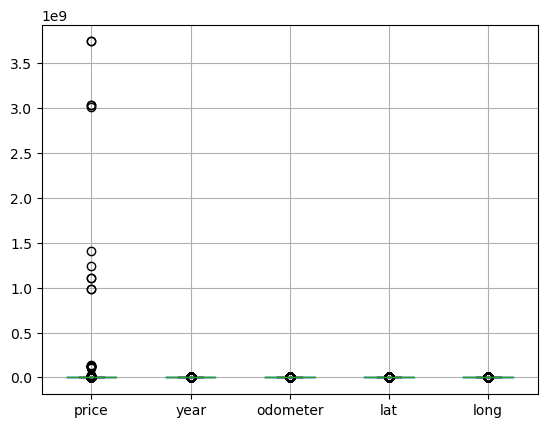

In [89]:
# box plot for detecting outliers
boxplot = df.boxplot()

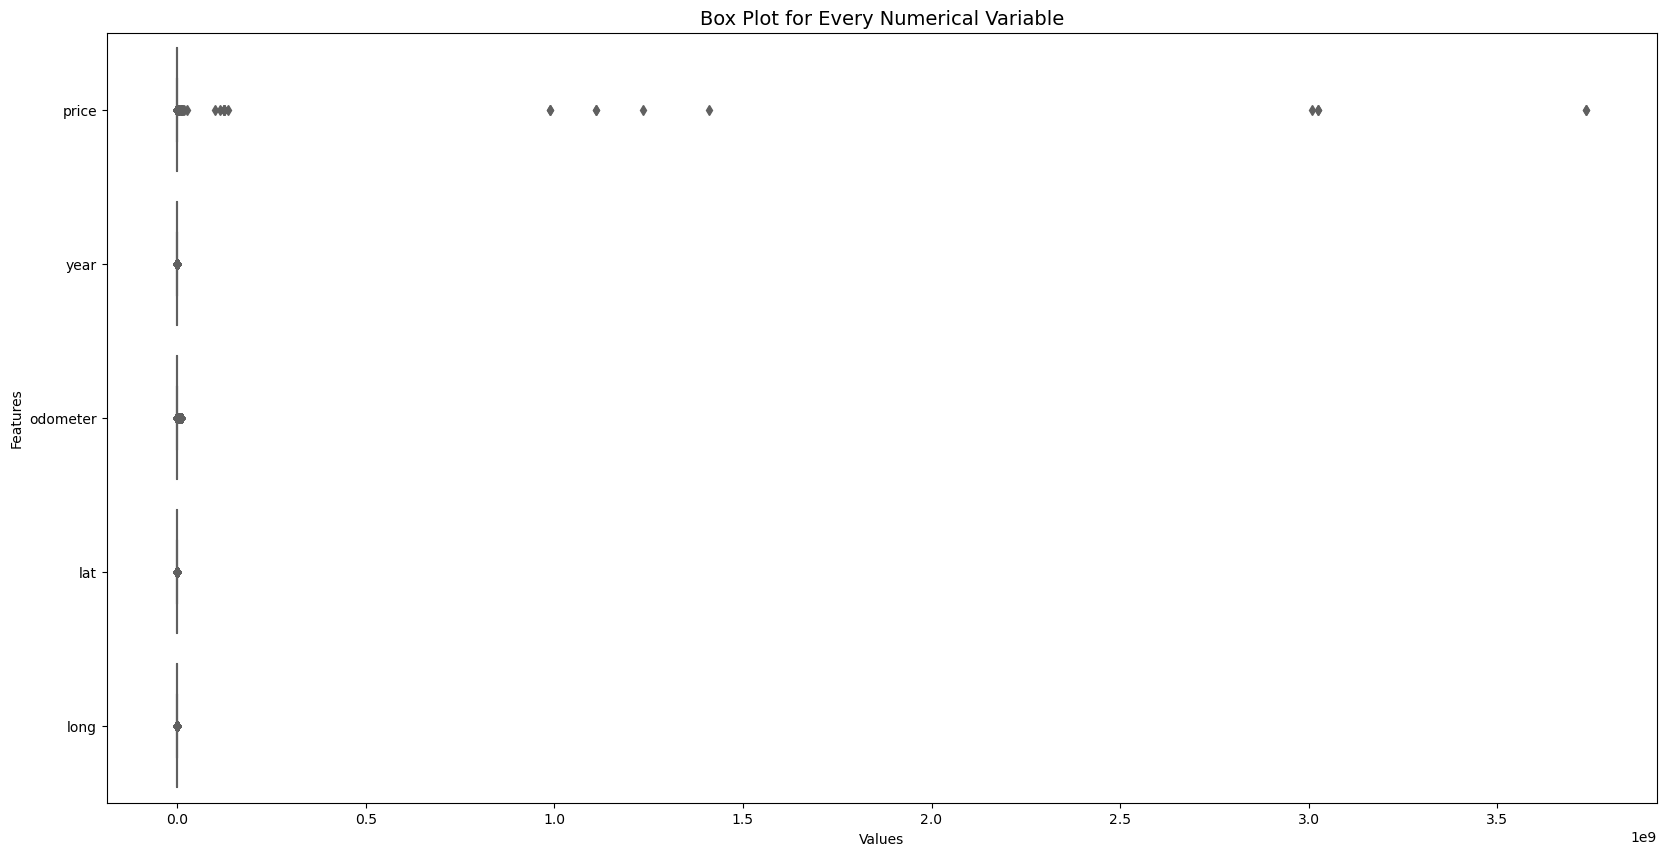

In [93]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h", palette="coolwarm")
plt.title("Box Plot for Every Numerical Variable", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

Handling outliers using IQR 

In [94]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    df = remove_outliers_iqr(df, col)

In [95]:
df.shape

(393269, 13)

- Show boxplot after removing outliers

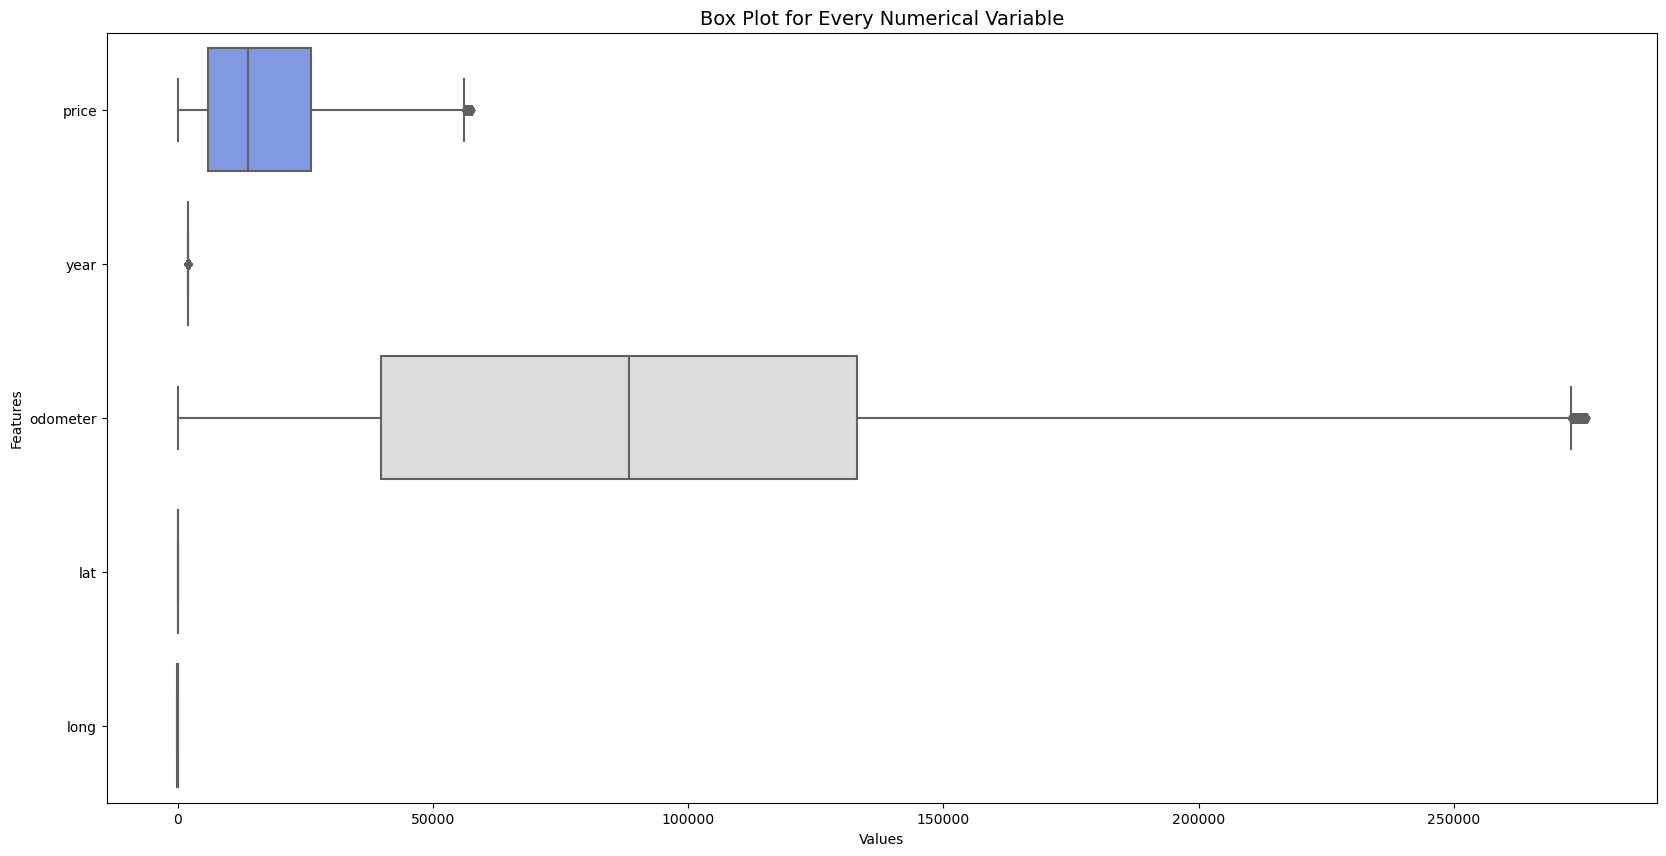

In [121]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h", palette="coolwarm")
plt.title("Box Plot for Every Numerical Variable", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

----------------------------------Business Questions and their answers--------------------------------

Q1:
- which year have the most car production 

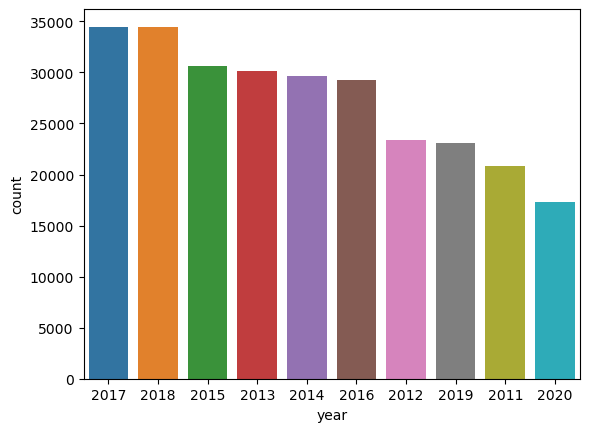

In [97]:

sns.countplot(x='year',data=df,order=df['year'].value_counts().index[:10])
plt.show();

Answer is 2017

Q2:
- is there is a relationship between fuel type and year ?

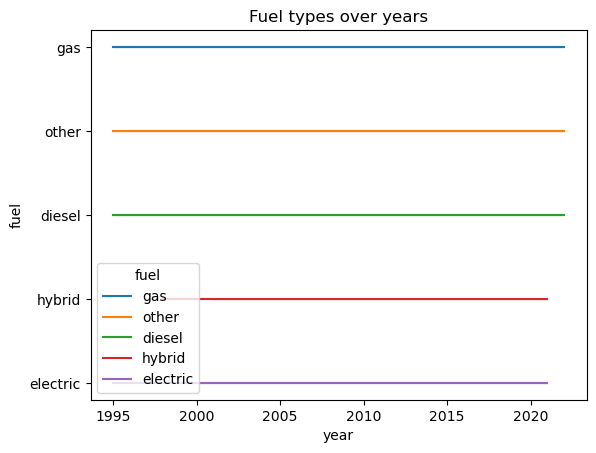

In [103]:

sns.lineplot(x = 'year' ,y = 'fuel',data =df ,hue = 'fuel')
plt.title("Fuel types over years")
plt.show();

- The answer is No 

Q3:
- What is the top 5 status of the cars?

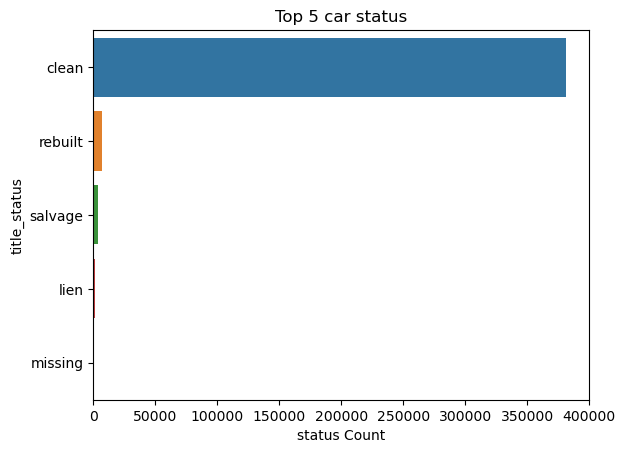

In [107]:

sns.countplot(y=df['title_status'] , data =df,order =df['title_status'].value_counts().index[:5])
plt.xlabel('status Count')
plt.title('Top 5 car status');

- The most car status is clean 

Q4:
- What is the most popular transmission?

<AxesSubplot:ylabel='transmission'>

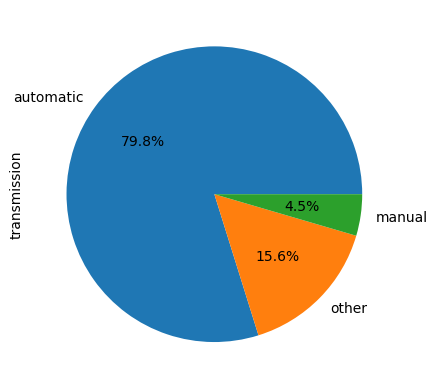

In [110]:

df['transmission'].value_counts().plot(kind='pie',autopct='%1.1f%%')

- The answer is automatic with 79.8% of data.

Q5:
 - What is the top 10 car types?

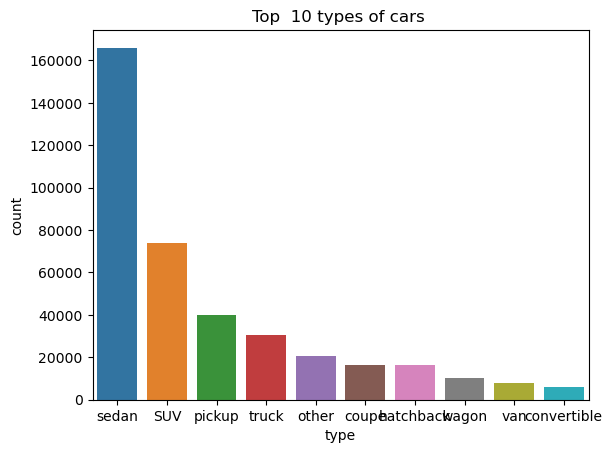

In [115]:

sns.countplot(x = df['type'], order=df['type'].value_counts().index[:10])
plt.title('Top  10 types of cars ') 
plt.show()

- Sedan is the most popular type of cars

Q6:
- What about prices over years?

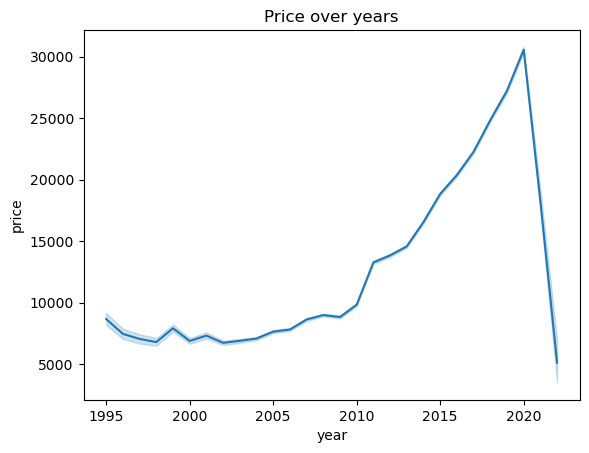

In [119]:

sns.lineplot(x = 'year' ,y = 'price',data =df)
plt.title("Price over years")
plt.show(); 

- prices was increasing untill 2020, it starts to decrease because of Corona-Virus